Import modules

In [368]:
import numpy as np
import matplotlib.pyplot as plt 
from keras.datasets import mnist
from tensorflow.python.keras.utils.np_utils import to_categorical

Define Functions

In [369]:
def plot_image(image): #定義plot_image函數，傳入image作為參數
    fig = plt.gcf() #設定顯示圖形的大小
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary') #傳入參數image、28*28像素的圖形，camp="binary"表示以黑白色顯示
    plt.show() #顯示圖片

In [370]:
def sigmoid(z):
    a = 1/(1 + np.exp(-z))
    return a

In [371]:
def loss(y, t):   #(pred, GT) #(y, y_train_onehot)
    num = y.shape[0]
    s = np.sum((y - t)**2) / num
    return s

In [372]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [373]:
def evaluate_model(X, y_true, w1, w2, b1, b2):
    # 進行預測
    a1 = np.dot(X, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    y_pred = sigmoid(a2)

    # 將預測轉換為二進制類別（0或1）
    y_pred_binary = (y_pred > 0.5).astype(int)

    # 計算混淆矩陣
    confusion_matrix = np.zeros((2, 2))
    for i in range(2):
        for j in range(2):
            confusion_matrix[i, j] = np.sum((y_pred_binary == i) & (y_true == j))

    # 計算 Accuracy、Precision 和 Recall
    true_positive = confusion_matrix[1, 1]
    false_positive = confusion_matrix[1, 0]
    false_negative = confusion_matrix[0, 1]

    accuracy = (true_positive + confusion_matrix[0, 0]) / np.sum(confusion_matrix)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)

    return confusion_matrix, accuracy, precision, recall


Train/Test Split

In [374]:
#X_train,y_train訓練
#X_test用來pred
#y_test為GT

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train[:25000]
y_train = y_train[:25000] 
X_train = X_train.reshape(25000, 784)
X_test  = X_test.reshape(10000, 784)

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [375]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((25000, 784), (25000,), (10000, 784), (10000,))

**Neural Network**

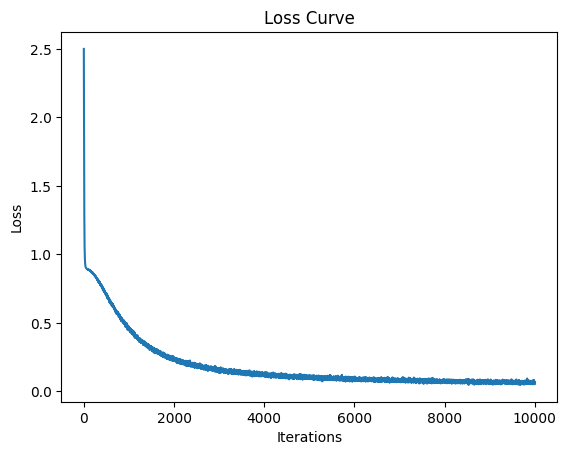

[2.5001933421944584,
 2.3664037790975754,
 2.2356813865300746,
 2.10499282849986,
 1.9733900859745457,
 1.8419833862060708,
 1.7218026292656081,
 1.613156623764667,
 1.5112460924902296,
 1.4260102854205077,
 1.3486885163962374,
 1.2840472212970304,
 1.2293731515272757,
 1.1848622540931495,
 1.143807492559132,
 1.1106731577064872,
 1.0822569984771204,
 1.0594839745442952,
 1.0375897382843386,
 1.0203911256043718,
 1.0048211870631876,
 0.9916435745454771,
 0.9805170471616634,
 0.9711283580540296,
 0.9622805906227033,
 0.9556730278758991,
 0.9486269188627225,
 0.9425763568783143,
 0.9387168309581603,
 0.9341047379774661,
 0.9304128840056649,
 0.9270845940477891,
 0.9242929788396907,
 0.9211501113614415,
 0.9192812871639374,
 0.9169617934287891,
 0.9141532620848942,
 0.9135308404863868,
 0.9116489366239837,
 0.9099459677111806,
 0.9089865686292646,
 0.9080042711307683,
 0.9065918774327153,
 0.9066585204586965,
 0.904558943430137,
 0.9045265720407731,
 0.9038079666088563,
 0.903104312202992

In [405]:
import numpy as np

# 初始化權重矩陣和偏置向量，這些是神經網絡的參數
w1 = 0.005 * np.random.randn(784,150)  # 第一層的權重矩陣
w2 = 0.005 * np.random.randn(150, 10)   # 第二層的權重矩陣
b1 = np.zeros(150)  # 第一層的偏置向量
b2 = np.zeros(10)  # 第二層的偏置向量

# 開始迭代訓練神經網絡
learning_rate = 0.003  # 學習速率

loss_list = []

for i in range(10000):  #10000
    # 選擇一個大小為 100 的隨機樣本批次，從訓練數據集（X_train）中選取
    batch_mask = np.random.choice(25000, 1000)
    X_batch = X_train[batch_mask]

    # 計算第一層的加權和，然後應用 sigmoid 函數
    a1 = np.dot(X_batch, w1) + b1
    z1 = sigmoid(a1)

    # 計算第二層的加權和，然後再次應用 sigmoid 函數
    a2 = np.dot(z1, w2) + b2
    y = sigmoid(a2)

    # 從訓練數據集中選取對應的目標值（標籤）批次
    y_batch = y_train_onehot[batch_mask]

    # 計算批次的大小
    num = X_batch.shape[0]

    # 計算輸出（y）相對於目標值（y_batch）的梯度
    dy = (y - y_batch) / num

    # 計算第二層權重（w2）的梯度
    dw2 = np.dot(z1.T, dy)

    # 計算第二層偏置（b2）的梯度
    db2 = np.sum(dy, axis=0)

    # 計算第一層輸出（z1）相對於第一層輸入（a1）的梯度
    da1 = np.dot(dy, w2.T)

    # 計算第一層的梯度，包括權重（w1）和偏置（b1）
    dz1 = sigmoid_grad(a1) * da1
    dw1 = np.dot(X_batch.T, dz1)
    db1 = np.sum(dz1, axis=0)

    # 使用梯度下降更新權重和偏置
    w2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    w1 -= learning_rate * dw1
    b1 -= learning_rate * db1



    a = loss(y, y_batch)
    loss_list.append(a)

# 繪製 loss 的曲線圖
plt.plot(loss_list)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()
loss_list

In [406]:
# 選擇一個大小為 100 的隨機樣本批次，從訓練數據集（X_train）中選取
batch_mask2 = np.random.choice(10000, 100)
X_batch2 = X_test[batch_mask2]

# 計算第一層的加權和，然後應用 sigmoid 函數
a1 = np.dot(X_batch2, w1) + b1
z1 = sigmoid(a1)

# 計算第二層的加權和，然後再次應用 sigmoid 函數
a2 = np.dot(z1, w2) + b2
y = sigmoid(a2)

# 從訓練數據集中選取對應的目標值（標籤）批次
y_batch2 = y_test_onehot[batch_mask2]

a = loss(y, y_batch2)
a

0.129253631474451

In [408]:
# 訓練集評估
train_confusion_matrix, train_accuracy, train_precision, train_recall = evaluate_model(X_train, y_train_onehot, w1, w2, b1, b2)
print("Training Set Evaluation:")
print("Confusion Matrix:")
print(train_confusion_matrix)
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)

# 測試集評估
test_confusion_matrix, test_accuracy, test_precision, test_recall = evaluate_model(X_test, y_test_onehot, w1, w2, b1, b2)
print("Test Set Evaluation:")
print("Confusion Matrix:")
print(test_confusion_matrix)
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)


Training Set Evaluation:
Confusion Matrix:
[[224648.   1461.]
 [   352.  23539.]]
Accuracy: 0.992748
Precision: 0.9852664183165208
Recall: 0.94156
Test Set Evaluation:
Confusion Matrix:
[[89636.  1042.]
 [  364.  8958.]]
Accuracy: 0.98594
Precision: 0.9609525852821283
Recall: 0.8958
